In [1]:
# Import relevant libraries
import requests
import json
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import random


from config import api_key

In [2]:
# Read in data from CSV to DataFrame
path = "./NY-House-Dataset.csv"
housing_df = pd.read_csv(path)

In [3]:
# Clean up data
def checknumeric(txt):
    return txt.isnumeric()

wrong_df = housing_df.loc[(housing_df["ADMINISTRATIVE_AREA_LEVEL_2"].apply(checknumeric)) | (housing_df["PRICE"] > 5000000)]
remove = wrong_df.index
housing_df = housing_df.drop(labels=remove)

housing_df = housing_df.drop(labels=["MAIN_ADDRESS","ADMINISTRATIVE_AREA_LEVEL_2","STREET_NAME","LONG_NAME", "FORMATTED_ADDRESS"], axis = 1)
housing_df.reset_index(inplace=True)
housing_df

,index,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022",New York,Manhattan,40.761255,-73.974483
1,2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
2,3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
3,5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238",New York,Kings County,40.674363,-73.958725
4,6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027",New York County,New York,40.809448,-73.946777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075",New York County,New York,40.774350,-73.955879
4445,4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374",New York,Queens County,40.732538,-73.860152
4446,4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011",New York,New York County,40.745882,-74.003398
4447,4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373",Queens County,Queens,40.742770,-73.872752


In [4]:
def plot_lin_regress(x,y,xlabel,ylabel,title,loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,loc,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    file_name = title.replace(" ","_")
    plt.savefig("output/"+file_name)
    return rvalue

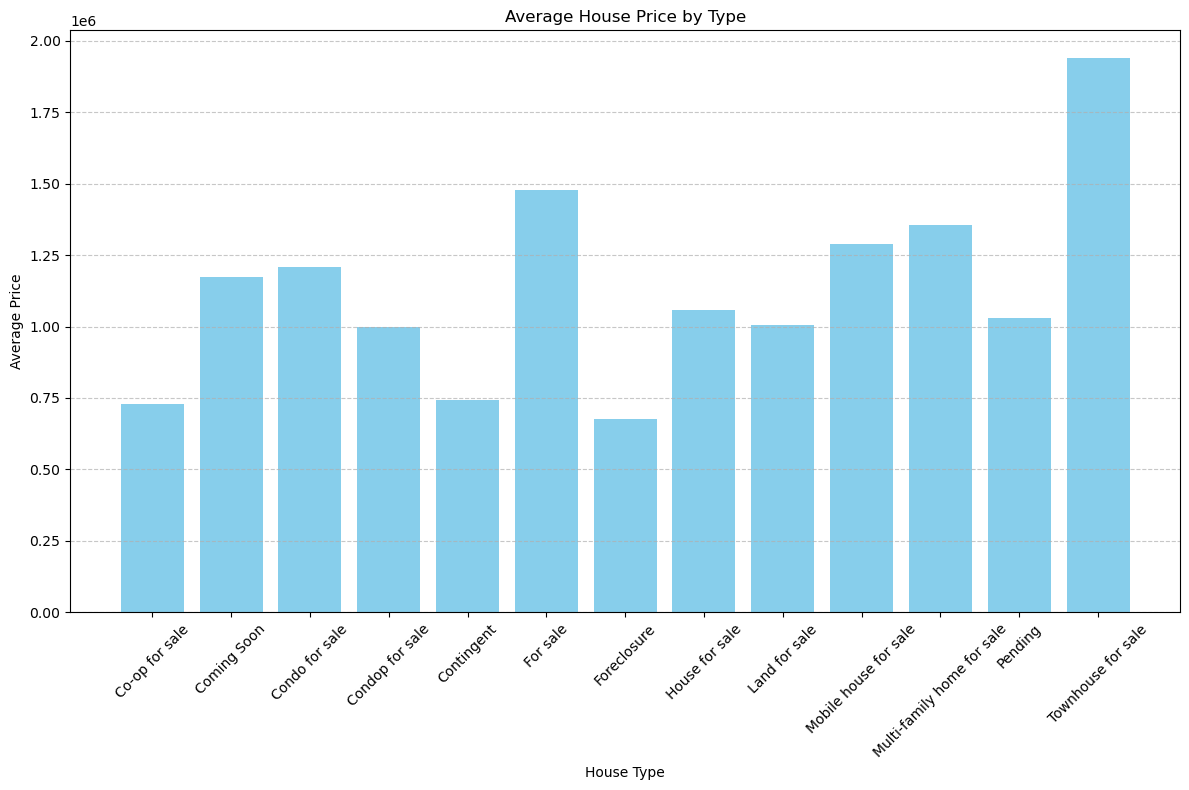

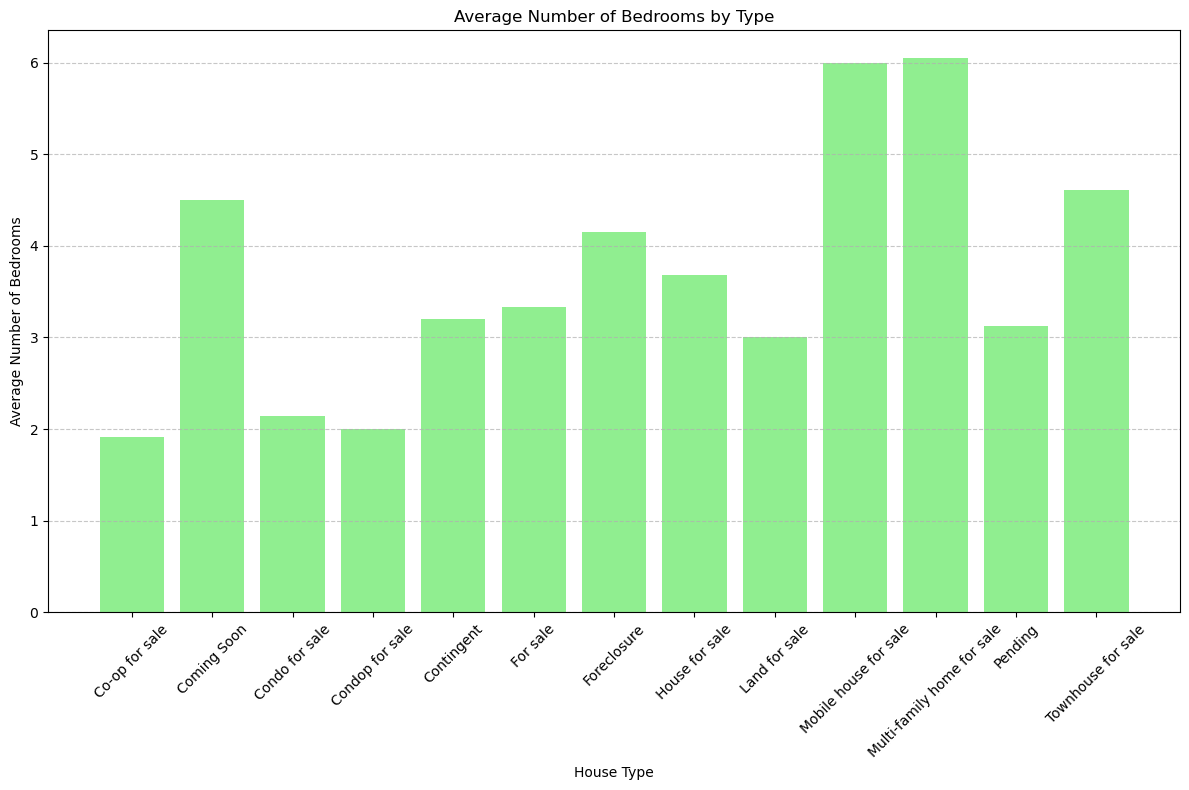

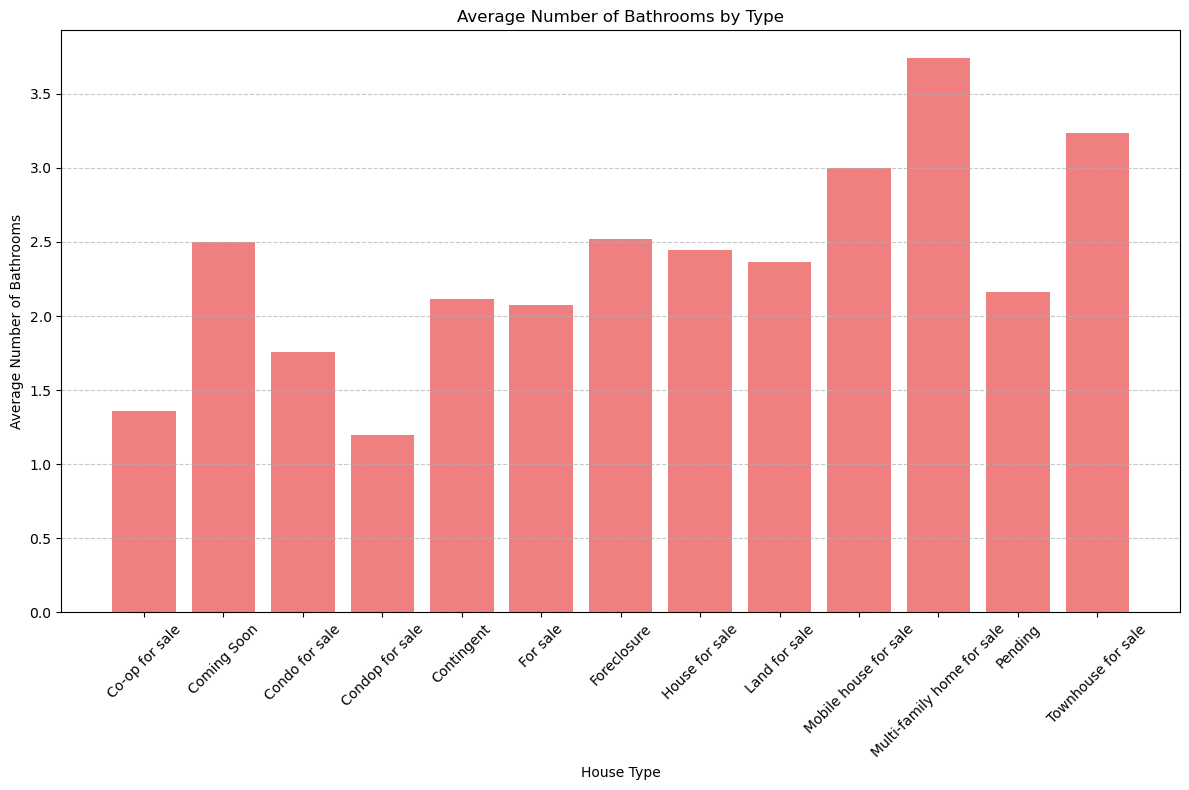

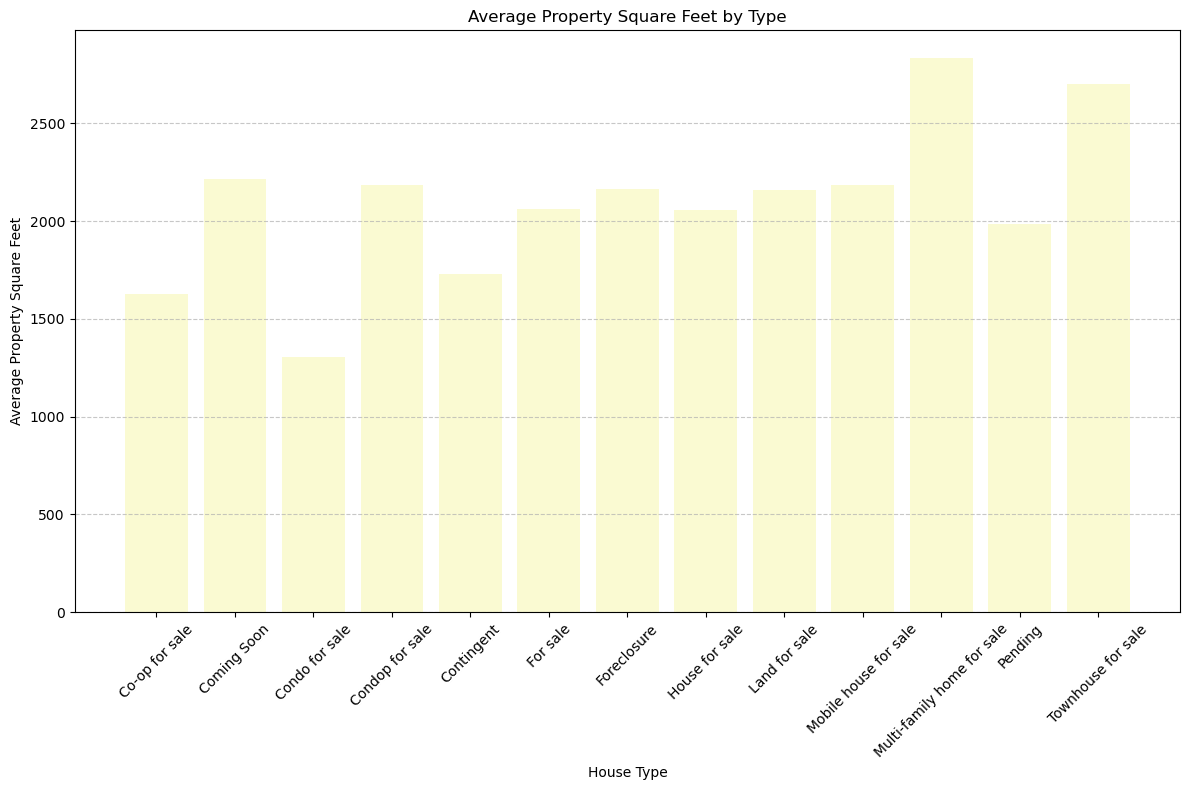

In [5]:
# General housing graphs
data = pd.DataFrame(housing_df)
aggregation = data.groupby('TYPE').agg({
    'BEDS': 'mean',
    'BATH': 'mean',
    'PRICE': 'mean',
    'PROPERTYSQFT': 'mean'
}).reset_index()

# Bar graphs of housing prices, rooms, etc.
# Plot 1: Average Price by House Type
plt.figure(figsize=(12, 8))
plt.bar(aggregation['TYPE'], aggregation['PRICE'], color='skyblue')
plt.title('Average House Price by Type')
plt.xlabel('House Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.savefig("./output/AveragePricebyHouseType")
plt.show()

# Plot 2: Average Number of Bedrooms by House Type
plt.figure(figsize=(12, 8))
plt.bar(aggregation['TYPE'], aggregation['BEDS'], color='lightgreen')
plt.title('Average Number of Bedrooms by Type')
plt.xlabel('House Type')
plt.ylabel('Average Number of Bedrooms')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.savefig("./output/AverageBedroomsbyHouseType")
plt.show()

# Plot 3: Average Number of Bathrooms by House Type
plt.figure(figsize=(12, 8))
plt.bar(aggregation['TYPE'], aggregation['BATH'], color='lightcoral')
plt.title('Average Number of Bathrooms by Type')
plt.xlabel('House Type')
plt.ylabel('Average Number of Bathrooms')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.savefig("./output/AverageBathroomsbyHouseType")
plt.show()

# Plot 4: Average Property Square Feet by House Type
plt.figure(figsize=(12, 8))
plt.bar(aggregation['TYPE'], aggregation['PROPERTYSQFT'], color='lightgoldenrodyellow')
plt.title('Average Property Square Feet by Type')
plt.xlabel('House Type')
plt.ylabel('Average Property Square Feet')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.savefig("./output/AverageSqrFtbyHouseType")
plt.show()

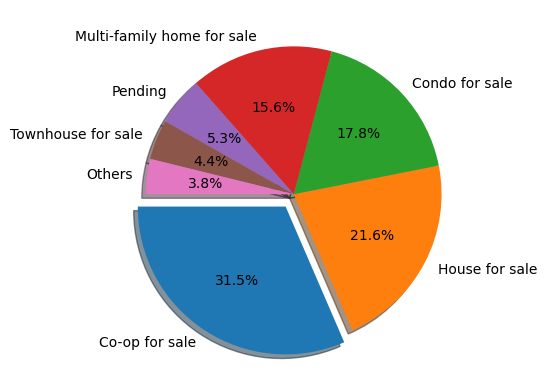

In [6]:
# Pie chart of house types
type_counts = housing_df["TYPE"].value_counts()
type_df = pd.DataFrame(type_counts).reset_index()
type_df

reduced_df = type_df[:6].copy()
others_df = pd.DataFrame({"TYPE": ["Others"], "count": [type_df["count"][6:].sum()]})

reduced_df = pd.concat([reduced_df, others_df])
reduced_df

explode = (0.1, 0, 0, 0, 0, 0, 0)

plt.pie(reduced_df["count"], labels=reduced_df["TYPE"], autopct='%1.1f%%', shadow=True, startangle=180, explode=explode)
plt.savefig("./output/PieChartHouseTypes")
plt.show()

R-Squared equals: 0.20102486344432638


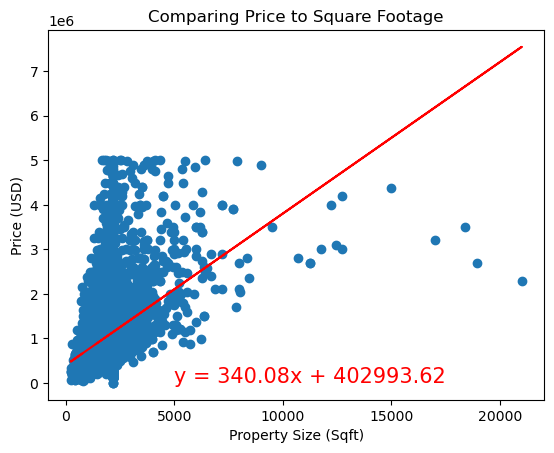

In [7]:
# Scatter plot comparing price to square footage

rvalue = plot_lin_regress(housing_df["PROPERTYSQFT"],housing_df["PRICE"],
                 "PROPERTYSQFT","PRICE","Comparing Price to Square Footage",(5000,0))
print(F"R-Squared equals: {rvalue**2}")

plt.xlabel('Property Size (Sqft)')
plt.ylabel('Price (USD)')
plt.title('Comparing Price to Square Footage')


plt.show()


#include linear regression

In [9]:
%%capture --no-display

# Marker Icon API of homes in NY displayed by "type"
NY_homes = housing_df.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 1,
    color = "TYPE",
    alpha = 0.5
)
hvplot.save(NY_homes, "./output/AllTypes.html")
NY_homes

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (TYPE)

In [10]:
# Narrow down houses that fit "House for sale" criteria 
homes_df = housing_df.loc[(housing_df['TYPE'] == 'House for sale')]
homes_df.head()

,index,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
1,2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
3,5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238",New York,Kings County,40.674363,-73.958725
17,20,Brokered by Radiant Estates LLC,House for sale,639999,3,2.0,1260.0,27 Clove Way,"Staten Island, NY 10301",New York,Richmond County,40.620740,-74.111436
21,24,Brokered by Elizabeth Marra,House for sale,750000,2,2.0,1330.0,280 Loretto St,"Staten Island, NY 10307",New York,Richmond County,40.503979,-74.239655
53,57,Brokered by American Homes Group,House for sale,998800,3,4.0,2400.0,1191 Clove Rd,"Staten Island, NY 10301",New York,Richmond County,40.617500,-74.103996


In [11]:
%%capture --no-display

# Marker Icon API of 'Houses for sale' by "sublocality"
NY_home = homes_df.hvplot.points(
    "LONGITUDE",
    "LATITUDE",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    #size = "PRICE",
    scale = 1,
    color = "SUBLOCALITY",
    alpha = 0.5,
    hover_cols=["ADDRESS", "PRICE"] 
)
hvplot.save(NY_home, "./output/AllHouses.html")
NY_home

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (SUBLOCALITY,ADDRESS,PRICE)

In [12]:
#Narrow down search to homes in Queens using "Sublocality" criteria 
home_df = homes_df.loc[(homes_df['SUBLOCALITY'] == 'Queens County')]
home_df.head()

,index,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
106,117,Brokered by Sowae Corp,House for sale,265000,3,1.0,2184.207862,135-38 224th St,"Springfield Gardens, NY 11413",New York,Queens County,40.675380,-73.747257
110,122,Brokered by Keller Williams Realty Liberty,House for sale,650000,3,2.0,1522.000000,237-14 93rd Rd,"Bellerose, NY 11426",New York,Queens County,40.723245,-73.729329
131,145,Brokered by Corcoran Park Slope,House for sale,1099000,4,2.0,2184.207862,204-34 9th Ave,"Queens, NY 11697",New York,Queens County,40.559561,-73.914741
133,147,Brokered by Laffey Real Estate,House for sale,839000,4,2.0,2184.207862,158-35 87th St,"Howard Beach, NY 11414",New York,Queens County,40.659091,-73.845197
134,148,Brokered by CENTURY 21 PROFESSIONAL REALTY,House for sale,659000,8,3.0,2184.207862,148-05 111th Ave,"Jamaica, NY 11435",New York,Queens County,40.688533,-73.796529


In [13]:
home_df = home_df.copy()

# Add empty columns to the DataFrame to store schools, hospitals, and supermarkets 
home_df.loc[:,"NEARBY SCHOOL"] = ""
home_df.loc[:,"SCHOOL DISTANCE"] = ""
home_df.loc[:,"NEARBY HOSPITAL"] = ""
home_df.loc[:,"HOSPITAL DISTANCE"] = ""
home_df.loc[:,"NEARBY SUPERMARKET"] = ""
home_df.loc[:,"SUPERMARKET DISTANCE"] = ""

home_df.reset_index(inplace=True)

# Display sample data
home_df.head()

,level_0,index,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,NEARBY SCHOOL,SCHOOL DISTANCE,NEARBY HOSPITAL,HOSPITAL DISTANCE,NEARBY SUPERMARKET,SUPERMARKET DISTANCE
0,106,117,Brokered by Sowae Corp,House for sale,265000,3,1.0,2184.207862,135-38 224th St,"Springfield Gardens, NY 11413",New York,Queens County,40.675380,-73.747257,,,,,,
1,110,122,Brokered by Keller Williams Realty Liberty,House for sale,650000,3,2.0,1522.000000,237-14 93rd Rd,"Bellerose, NY 11426",New York,Queens County,40.723245,-73.729329,,,,,,
2,131,145,Brokered by Corcoran Park Slope,House for sale,1099000,4,2.0,2184.207862,204-34 9th Ave,"Queens, NY 11697",New York,Queens County,40.559561,-73.914741,,,,,,
3,133,147,Brokered by Laffey Real Estate,House for sale,839000,4,2.0,2184.207862,158-35 87th St,"Howard Beach, NY 11414",New York,Queens County,40.659091,-73.845197,,,,,,
4,134,148,Brokered by CENTURY 21 PROFESSIONAL REALTY,House for sale,659000,8,3.0,2184.207862,148-05 111th Ave,"Jamaica, NY 11435",New York,Queens County,40.688533,-73.796529,,,,,,


In [16]:
# Places API of facilities near "homes for sale" in Queens County
radius = 10000
nearest_places = {}

categories = {
    "School": "education.school",
    "Hospital": "healthcare.hospital",
    "Supermarket": "commercial.supermarket"
}

small_df = home_df.iloc[:, 0:30]


for index, row in small_df.iterrows():

    latitude = row["LATITUDE"]
    longitude = row["LONGITUDE"]

    for place_type, category in categories.items():
        params = {
            "categories": category,
            "apiKey": api_key,
            "limit": 5,  
            "filter": f"circle:{longitude},{latitude},{radius}",
            "bias": f"proximity:{longitude},{latitude}"
        }

        base_url = "https://api.geoapify.com/v2/places"
        response = requests.get(base_url, params=params)
        result = response.json()

        nearest_places[place_type + "Distance"] = 10000
        
        try:
            nearest_places[place_type] = result["features"][0]["properties"]["name"]
            nearest_places[place_type + " Distance"] = result["features"][0]["properties"]["distance"]
        except (KeyError, IndexError):
            nearest_places[place_type] = "No result found"

    # Print results to corresponding column in the DataFrame
    small_df.loc[index, "NEARBY SCHOOL"] = nearest_places.get("School")
    small_df.loc[index, "SCHOOL DISTANCE"] = nearest_places.get("School Distance")
    small_df.loc[index, "NEARBY HOSPITAL"] = nearest_places.get("Hospital")
    small_df.loc[index, "HOSPITAL DISTANCE"] = nearest_places.get("Hospital Distance")
    small_df.loc[index, "NEARBY SUPERMARKET"] = nearest_places.get("Supermarket")
    small_df.loc[index, "SUPERMARKET DISTANCE"] = nearest_places.get("Supermarket Distance")

    # Print the results for the current home
    print(f"{index+1} of {len(small_df)} - nearest school: {nearest_places.get('School')}, "
          f"nearest hospital: {nearest_places.get('Hospital')}, "
          f"nearest supermarket: {nearest_places.get('Supermarket')}")

# Display the updated DataFrame
home_df.head()

1 of 304 - nearest school: Christopher Robin Academy, nearest hospital: Saint Albans Community Living Center, nearest supermarket: Key Food
2 of 304 - nearest school: No result found, nearest hospital: Creedmor Psychiatric Center, nearest supermarket: Food Marketplace
3 of 304 - nearest school: PS 195 Manhattan Beach, nearest hospital: Triborough GI, nearest supermarket: Deirdre Maeve's Market
4 of 304 - nearest school: Public School 207, nearest hospital: Brooklyn Developmental Disabilities Services Offices, nearest supermarket: Stop & Shop
5 of 304 - nearest school: PS48Q The David N. Dinkins School for Community Service, nearest hospital: Jamaica Hospital Medical Center, nearest supermarket: Titash Super Market
6 of 304 - nearest school: PS48Q The David N. Dinkins School for Community Service, nearest hospital: Jamaica Hospital Medical Center, nearest supermarket: Titash Super Market
7 of 304 - nearest school: The Yaakov & Ilana Melohn Campus, nearest hospital: Saint John's Episcopa

KeyboardInterrupt: 

In [51]:
home_df.head(40)

,level_0,index,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,NEARBY SCHOOL,NEARBY HOSPITAL,NEARBY SUPERMARKET,SCHOOL DISTANCE,HOSPITAL DISTANCE,SUPERMARKET DISTANCE
0,106,117,Brokered by Sowae Corp,House for sale,265000,3,1.000000,2184.207862,135-38 224th St,"Springfield Gardens, NY 11413",New York,Queens County,40.675380,-73.747257,Christopher Robin Academy,Saint Albans Community Living Center,Key Food,289,2151,345
1,110,122,Brokered by Keller Williams Realty Liberty,House for sale,650000,3,2.000000,1522.000000,237-14 93rd Rd,"Bellerose, NY 11426",New York,Queens County,40.723245,-73.729329,No result found,Creedmor Psychiatric Center,Food Marketplace,289,1062,237
2,131,145,Brokered by Corcoran Park Slope,House for sale,1099000,4,2.000000,2184.207862,204-34 9th Ave,"Queens, NY 11697",New York,Queens County,40.559561,-73.914741,PS 195 Manhattan Beach,Triborough GI,Deirdre Maeve's Market,3265,4316,280
3,133,147,Brokered by Laffey Real Estate,House for sale,839000,4,2.000000,2184.207862,158-35 87th St,"Howard Beach, NY 11414",New York,Queens County,40.659091,-73.845197,Public School 207,Brooklyn Developmental Disabilities Services O...,Stop & Shop,100,1578,627
4,134,148,Brokered by CENTURY 21 PROFESSIONAL REALTY,House for sale,659000,8,3.000000,2184.207862,148-05 111th Ave,"Jamaica, NY 11435",New York,Queens County,40.688533,-73.796529,PS48Q The David N. Dinkins School for Communit...,Jamaica Hospital Medical Center,Titash Super Market,514,1397,75
5,135,149,Brokered by CENTURY 21 PROFESSIONAL REALTY,House for sale,659000,8,3.000000,2184.207862,148-05 111th Ave,"Jamaica, NY 11435",New York,Queens County,40.688533,-73.796529,PS48Q The David N. Dinkins School for Communit...,Jamaica Hospital Medical Center,Titash Super Market,514,1397,75
6,136,150,Brokered by Anthony Napolitano Homes,House for sale,399999,3,1.000000,2184.207862,178 Beach 24th St,"Far Rockaway, NY 11691",New York,Queens County,40.595002,-73.757738,The Yaakov & Ilana Melohn Campus,Saint John's Episcopal Hospital,Shop Fair,395,459,304
7,139,153,Brokered by Epiphany Realty Llc,House for sale,650000,4,2.000000,2244.000000,115115 220th St,"Cambria Heights, NY 11411",New York,Queens County,40.696871,-73.739040,P.S. 147Q Ronald McNair,Saint Albans Community Living Center,Compare Foods,104,2334,1513
8,144,158,Brokered by Keller Williams City Views,House for sale,1175000,3,2.000000,2250.000000,251 Beach 140th St,"Rockaway Park, NY 11694",New York,Queens County,40.573720,-73.857779,Yeshiva of Belle Harbor,Triborough GI,Rockaway Greens,443,8101,1852
9,146,160,Brokered by Hauseit LLC,House for sale,995000,3,2.000000,2184.207862,159-03 83rd St,"Howard Beach, NY 11414",New York,Queens County,40.657686,-73.848913,Public School 207,Brooklyn Developmental Disabilities Services O...,Stop & Shop,389,1236,954


R-Squared equals: 0.008965841112563242


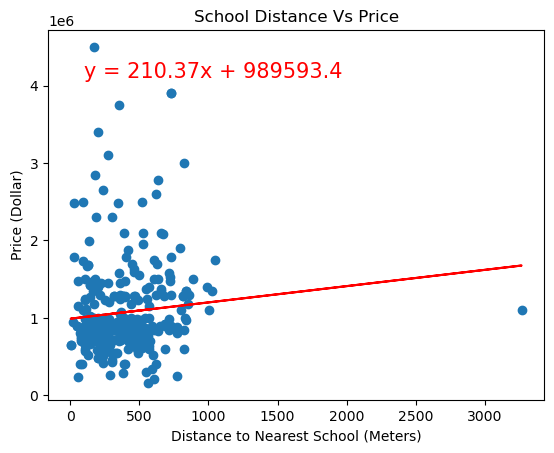

In [48]:
#Scatter plot of School Distance Data 

rvalue = plot_lin_regress(home_df["SCHOOL DISTANCE"].astype("int64"),home_df["PRICE"],
                 "Distance to Nearest School (Meters)","Price (Dollar)","School Distance Vs Price",(100,4100000))
print(F"R-Squared equals: {rvalue**2}")
plt.show()

R-Squared equals: 0.0007943243035563915


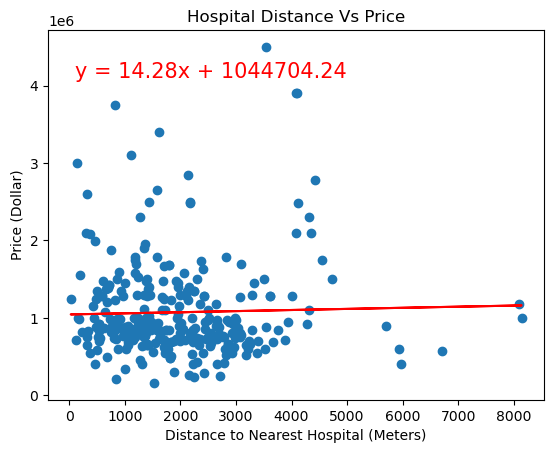

In [49]:
#Scatter plot of Hospital Distance Data 

rvalue = plot_lin_regress(home_df["HOSPITAL DISTANCE"].astype("int64"),home_df["PRICE"],
                 "Distance to Nearest Hospital (Meters)","Price (Dollar)","Hospital Distance Vs Price",(100,4100000))
print(F"R-Squared equals: {rvalue**2}")
plt.show()

R-Squared equals: 0.00018927516223921287


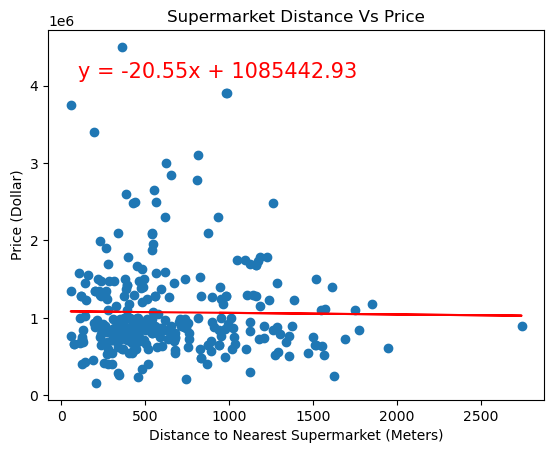

In [50]:
#Scatter plot of Supermarket Distance Data 

rvalue = plot_lin_regress(home_df["SUPERMARKET DISTANCE"].astype("int64"),home_df["PRICE"],
                 "Distance to Nearest Supermarket (Meters)","Price (Dollar)","Supermarket Distance Vs Price",(100,4100000))
print(F"R-Squared equals: {rvalue**2}")
plt.show()

In [39]:
# Analysis Text

In [ ]:
# References